In [6]:
# conventional way to import pandas
import pandas as pd
# conventional way to import seaborn
import seaborn as sns
# conventional way to import numpy
import numpy as np

import math

from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Hitters.csv", index_col=0)

data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


After listing the data we can see that some have missing data for their Salary. Next drop all the rows that contain NaN data.

In [4]:
data = data.dropna()
data.index.name = 'Player'
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In the lab they use a R funktion that we don't have in python. That funktion automatically transforms any qualitative variables into dummy variables. But in python we will have to do this by hand using the following code and display infomation about the variables we converted from strings to numbers.

In [5]:
dummieVariables = pd.get_dummies(data[['League', 'Division', 'NewLeague']])
dummieVariables.info()
print(dummieVariables.head())

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 6 columns):
League_A       263 non-null uint8
League_N       263 non-null uint8
Division_E     263 non-null uint8
Division_W     263 non-null uint8
NewLeague_A    263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: uint8(6)
memory usage: 3.6+ KB
                   League_A  League_N  Division_E  Division_W  NewLeague_A  \
Player                                                                       
-Alan Ashby               0         1           0           1            0   
-Alvin Davis              1         0           0           1            1   
-Andre Dawson             0         1           1           0            0   
-Andres Galarraga         0         1           1           0            0   
-Alfredo Griffin          1         0           0           1            1   

                   NewLeague_N  
Player                          
-Alan Ashby             

Next we must remove the columns with our independent variable (Salary), and columns for which we created dummy variables and reinterduce them into our predictors. This is do so the data fit the data in the book.

In [5]:
y = data.Salary
X_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dummieVariables[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
Player,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
-Alvin Davis,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
-Andre Dawson,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
-Andres Galarraga,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
-Alfredo Griffin,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


Now that our data is ready it's time to import Ridge from Scikit-learn.

In [6]:
from sklearn.linear_model import Ridge

Next we choose our lamda and change it over time. But please note that lamda is used in the book but in scikit-learn it's just called alpha. The plot below shows that the Ridge coefficients get bigger as we our decrease alpha.

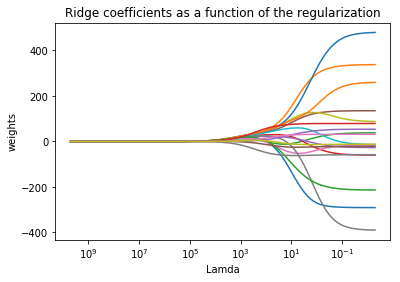

In [20]:
##Ploting code from scikit-learn.org
## http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py
from sklearn.preprocessing import scale
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X), y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('Lamda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');
plt.show()

Now we spilt the data into a tranining and testing set like the book. 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Now we run the ridge with an alpha set to 4. This means RSS + α * (sum of square of coefficients). And we get a high error, we will fix that in a little bit.
And as we leraned setting α to 0 makes it become same as simple linear regression. Therefor we choose a alpha between 0 < α < ∞ and then α will decide the penelty given. 

In [9]:
ridge = Ridge(alpha=4)
ridge.fit(X_train, y_train)
result = ridge.predict(X_test)
metrics.mean_squared_error(y_test, result)

134512.83820473132

Now that we have set our alpha to 4 we can see the cofficents

In [10]:
pd.Series(ridge.coef_.flatten(), index=X.columns)

AtBat          -2.185390
Hits            7.392346
HmRun          -2.666724
Runs           -1.726630
RBI             2.052275
Walks           5.054541
Years           4.650624
CAtBat         -0.288366
CHits           1.091115
CHmRun          2.499939
CRuns           0.253253
CRBI           -0.092873
CWalks         -0.471348
PutOuts         0.308319
Assists         0.141333
Errors          2.617261
League_N       29.050228
Division_W    -98.575604
NewLeague_N     4.138780
dtype: float64

If we make our alpha even bigger alpha = 10^10 then our the gets more model more biased and we get a bigger MSE

In [21]:
ridge = Ridge(alpha=math.pow(10, 10))
ridge.fit(X_train, y_train)
result = ridge.predict(X_test)
metrics.mean_squared_error(y_test, result)

211698.60251243794

In [22]:
pd.Series(ridge.coef_.flatten(), index=X.columns)

AtBat          5.135079e-04
Hits           1.771301e-04
HmRun          2.568334e-05
Runs           9.182202e-05
RBI            1.076703e-04
Walks          8.268246e-05
Years          1.407257e-05
CAtBat         9.110699e-03
CHits          2.738995e-03
CHmRun         3.593241e-04
CRuns          1.408125e-03
CRBI           1.480711e-03
CWalks         9.624986e-04
PutOuts        9.721509e-04
Assists        5.328385e-07
Errors         1.777329e-06
League_N      -1.830721e-07
Division_W    -8.347849e-07
NewLeague_N   -1.390350e-07
dtype: float64

To fix this problem we will apply use RidgeCV. That is Ridge regression with built-in cross-validation. Using this tekunike we will search for the best alpha 

In [17]:
from sklearn.linear_model import RidgeCV
alphas = 10**np.linspace(100,-4,1000)
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)
ridgecv.alpha_

2.3570694139967037

In [19]:
ridge = Ridge(2.3570694139967037)
ridge.fit(X_train, y_train)
result = ridge.predict(X_test)
metrics.mean_squared_error(y_test, result)

134355.75204499933